<div align="center" style="width: 100%; background-color: #F7F7F7; margin-bottom: 3em;">
    <h1 style="font-family: courier; color: #AF4545; font-size: 4em; padding-top: .5em;"><b>Statistical fundamentals and terminology for model building and validation</b></h1>
    <img src="../img/statistics-head.png">    
</div>

Este estudo é baseado no livro `Statistics for Machine Learning`, e o código abaixo possui trechos integrais do livro. Dito isso existem algumas adaptações, sugestões e complementos que jugo necessários.

---

Par iniciar vou importar os pacotes necessários na primeira parte do estudo.

In [1]:
import numpy as np
from scipy import stats

Esta é uma introdução básica, a estatística é um tema para uma vida quanto mais um notebook. Com isso em mente, vou me ater aos principais pontos, os necessários para um bom conhecimento do universo do `Machine Learning`.

> A análise preditiva se baseia na suposição de que a história tende a se repetir.

Neste caso, para fazermos predições, nosso objetivo será ajustar um **modelo matemático** aos dados históricos validando suas principais medidas, de tal maneira que este modelo possa ser utilizado a fim de prever eventos futuros baseados nas mesmas **variáveis explicativas** que estudamos no passado.

Modelos estatísticos são uma classe de modelos matemáticos que geralmente são especificados por equações matemáticas que relacionam uma ou mais variáveis a fim de se aproximar a realidade. Pressupostos incorporados por modelos estatísticos descrevem um conjunto de distribuições de probabilidade, que o diferencia dos modelos não estatísticos, matemáticos ou de aprendizado de máquina.

Os modelos estatísticos sempre começam com algumas suposições subjacentes para as quais todas as variáveis devem se manter; então, o desempenho fornecido pelo modelo é estatisticamente significativo. Portanto, conhecer os vários bits envolvidos em todos os blocos de construção fornece uma base sólida para ser um bom cientista de dados.

* **População (Population)**: é a totalidade, a lista completa de observações ou todos os pontos de dados sobre o assunto em estudo.
* **Amostra (Sample)**: uma amostra é um subconjunto de uma população, geralmente uma pequena parte da população que está sendo analisada.

Geralmente, é caro realizar uma análise em uma população inteira; portanto, a maioria dos métodos estatísticos trata de tirar conclusões sobre uma população analisando uma amostra.

* **Parâmetro versus estatística (Parameter versus statistic)**: qualquer medida calculada na população é um parâmetro, enquanto que em uma amostra é chamada de estatística.
* **Média (Mean)**: Esta é uma média aritmética simples, calculada pela soma agregada dos valores dividida por uma contagem desses valores. A média é sensível aos valores discrepantes nos dados. Um valor externo é o valor de um conjunto ou coluna que é altamente desviado de muitos outros valores nos mesmos dados; geralmente tem valores muito altos ou baixos.
* **Mediana (Median)**: é o ponto médio dos dados e é calculado organizando-os em ordem crescente ou decrescente. Se houver N observações.
* **Moda (Mode)**: é o ponto mais repetitivo nos dados:

![0](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d7ca0b32-24a6-43fd-8281-3f995895ff1b.png)

O código abaixo usa o pacote stats e numpy para calular a média (median), mediana (median) e moda (mode).

A matriz inicial foi criada utilizando o numpy, isso dado que os modelos estatísticos utilizados neste estudo serão criados utilizando o pacote scikit-learn, que é baseado no numpy.

In [2]:
data = np.array([4,5,1,2,7,2,6,9,3])

# Calculate Mean
dt_mean = np.mean(data)
print ("Mean :",round(dt_mean,2))
              
# Calculate Median                 
dt_median = np.median(data)
print ("Median :",dt_median)

# Calculate Mode                     
dt_mode =  stats.mode(data)
print ("Mode :",dt_mode[0][0])

Mean : 4.33
Median : 4.0
Mode : 2


## Distribuições de probabilidade

As principais distribuições de probabilidade estão implementadas na biblioteca `scipy.stats`. Todas as distribuições implementadas nesta biblioteca tem um conjunto rico de métodos os principais são:

  - **pdf**: função densidade probabilidade ou função de probabilidade.
  - **cdf**: função de distribuição acumulada.
  - **sf**: função de sobreviência (complementar da cdf).
  - **ppf**: função quantil (inversa da cdf).
  - **isf**: inversa da função de sobreviência (complementar do inverso da cdf).
  - **stats**: esperança, variância, assimetria (skew) e curtose.
  - **moment**: Momentos não centrais.
  - **rvs**: amostras aleatórias.

Interessante notar que funções como a pdf e cdf são definidas na reta real, mesmo que a distribuição não corresponda a este suporte. Neste caso as funções vão retornar zero no caso da pdf e 0 ou 1 no caso da cdf. Por exemplo, o suporta da distribuição beta é o intervalo aberto (0,1). Assim, se a pdf fora deste intervalo será 0 e a cdf abaixo de 0 será 0 e acima de 1 será 1. 

Outro aspecto interessante da forma como a biblioteca `scipy.stats` implementa as distribuições é que você pode usá-las de duas formas: a primeira é a chamada forma congelada onde você inicializa a distribuição com os parâmetros de interesse e depois usa. A segunda você aplica a função diretamente passando como argumentos o ponto e os parâmetros para a avaliação da função. Vamos ver um exemplo:

In [3]:
import scipy.stats as sp

print(sp.norm.pdf(5, 3, 4)) # Avalia a distribuição Normal com mu = 3 e sigma2 = 4 no ponto 5.

mydist = sp.norm(3, 4) # Modo frozen 
print(mydist.pdf(5))

0.08801633169107488
0.08801633169107488


A biblioteca `scipy.stats` é muito rica em distribuições e a documentação é muito detalhada recomendo que veja o site da biblioteca [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Um outro aspecto útil é que todas as distribuições contínuas estão implementadas como um modelo de locação e escala. Esta é uma abordagem um pouco não usual, mas uma grande vantagem é que sabemos a parametrização de todas as distribuições contínuas previamente. A lista de distribuições é muito extensa e inclui distribuições multivariadas como a Gaussiana, Dirichlet e Wishart. 

Como um exemplo para explorar como usamos as distribuições da `scipy.stats` vou usar em um primeiro momento a distribuição Gaussiana porque suas propriedades são bem conhecidas. Em um segundo momento fazer usar uma distribuição não usual como a *generalized extreme value distribution*. Vamos calcular algumas quantidades da distribuição Gaussiana.

In [4]:
my_norm = sp.norm(loc = 10, scale = 5)
# Aspectos da distribuição
my_norm.expect() # Esperança
my_norm.median() # Mediana
my_norm.moment(n = 1) # Primeiro momento (esperança)
my_norm.moment(n = 2) # Segundo momento
my_norm.stats() # Média e variancia
my_norm.std() # Erro padrão
my_norm.var() # Variance
my_norm.entropy() # Entropia

mean, var, skew, kurt = my_norm.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

10.0 25.0 0.0 0.0


Ainda não falamos sobre gráficos em python, mas eu vou inicializar uma figura, mais detalhes serão vistos nos próximos encontros. Gráfico da função densidade probabilidade.

Vamos simular uma amostra aleatório da distribuição Gaussiana e fazer um histograma e sobrepor a densidade que acabamos de calcular.

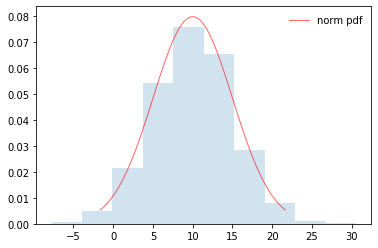

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1)

x = np.linspace(my_norm.ppf(0.01), my_norm.ppf(0.99), 100)
ax.plot(x, my_norm.pdf(x), 'r-', lw=1, alpha=0.6, label='norm pdf')

amostra = my_norm.rvs(10000)
ax.hist(amostra, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

plt.show()

Outro método que também está disponível para todas as distribuições implementadas na biblioteca `scipy.stats` é o método `fit`. Como o nome sugere este método ajusta a distribuição para um vetor de observações. 

In [6]:
amostra = my_norm.rvs(100)
print(sp.norm.fit(amostra)) # Ajustando a própria Normal
print(sp.t.fit(amostra)) # Ajustando a distribuição t
print(sp.cauchy.fit(amostra)) # Cauchy ou qq outra que seja adequada.

(9.708235276775888, 4.69668219232939)
(5349716.87731085, 9.708343871447159, 4.696777047664349)
(9.2304936802949, 2.957632948450315)


Em geral as distribuições de probabilidade implementadas na biblioteca `scipy.stats` são vetorizadas. Assim, se o argumento for um objeto `ndarray` a função será aplicada em cada uma das entradas do `ndarray` e a saída também será um `ndarray`.

In [7]:
a = np.array([-3,-2,-1,0,1,2,3])
sp.norm.pdf(a, loc = 0, scale = 1)

array([0.00443185, 0.05399097, 0.24197072, 0.39894228, 0.24197072,
       0.05399097, 0.00443185])

Assim termino esta rápida introdução de como e onde as funções de probabilidades estão implementadas em python. Na sequência vou introduzir as principais idéias de otimização de funções em python.

## Otimização

Otimização de funções tem um papel central em inferência estatística. Uma vez que o estimador de maxima verossimilhança é o supremo da função de log-verossimilhança encontrar este ponto é crucial para o processo de inferência. O python através do modulo `scipy.optimization` fornece vários algoritmos para numericamente encontrar o mínimo/máximo de uma função pré-especificada. Este modulo também fornece algoritmos para solução de sistemas de equações não-lineares e minimização via métodos dos mínimos quadrados. Vamos ver alguns exemplos de como usar esta poderosa biblioteca. Como exemplo vou implementar a log-verossimilhança de um modelo de regressão linear simples.

In [8]:
x = np.array(range(0,10))
par = np.array([2,0.8,0.5])
my_norm = sp.norm(loc = 0, scale = par[2])
e = my_norm.rvs(len(x))
mu = par[0] + par[1]*x
y = mu + e
print(y)

[2.51650241 3.09539161 2.94864942 4.15234306 5.68080283 5.22924572
 5.86809571 7.25463115 8.67303766 8.91618494]


In [9]:
from scipy.optimize import minimize
from math import exp, log

def linreg(par, y, x):
    mu = par[0] + par[1]*x
    output = -sp.norm.logpdf(y, loc = mu, scale = exp(par[2])).sum()
    #print(output)
    return(output)

# Avaliando a log-lik no ponto
linreg(par = np.array([2.1788,0.7743, log(0.3817)]), y = y, x = x) 

# Valores iniciais
par = np.array([2,0.8, log(2)])

# Nelder-Mead
res1 = minimize(linreg, par, method='nelder-mead', args = (y,x))
print(res1.x)
print(res1.fun)

# Gradiente Conjugado
res2 = minimize(linreg, par, method = 'CG', args = (y,x))
print(res2.x)
print(res2.fun)

# BFGS
res3 = minimize(linreg, par, method = 'BFGS',  args = (y,x))
print(res3.x)
print(res3.fun)

# Powell
res4 = minimize(linreg, par, method = 'Powell', args = (y,x))
print(res4.x)
print(res4.fun)

# Escore
print(res3.jac)

# Temos o inverso do hessiano
print(res3.hess_inv)

[ 2.08257572  0.74465029 -0.73975402]
6.792110640676109
[ 2.0825901   0.74464408 -0.73972768]
6.792110622630275
[ 2.08259022  0.74464405 -0.7397274 ]
6.792110622630187
[ 2.08225433  0.7446971  -0.74038164]
6.792115621087034
[-3.57627869e-07 -8.28504562e-06  1.54972076e-06]
[[ 0.0875535  -0.01430076 -0.00244704]
 [-0.01430076  0.0031595   0.00045238]
 [-0.00244704  0.00045238  0.05374031]]


* **Medida de dispersão ou variabilidade (Measure of variation)**: Dispersão é a variação nos dados e mede as inconsistências no valor das variáveis nos dados. A dispersão, na verdade, fornece uma idéia sobre o spread, em vez de valores centrais.
* **Faixa (Range)**: Essa é a diferença entre o máximo e o mínimo do valor.
* **Variância (Variance)**: é a média dos desvios ao quadrado da média ($xi$ = pontos de dados, $µ$ = média dos dados, $N$ = número de pontos de dados). A dimensão da variação é o quadrado dos valores reais. A razão para usar o denominador $N-1$ para uma amostra em vez de $N$ na população é devido ao grau de liberdade. 1 grau de liberdade perdido em uma amostra no momento do cálculo da variação é devido à extração da substituição da amostra:

![1](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/04829f06-fff4-4694-9b3e-62508ac4a609.jpg)

* **Desvio padrão (Standard deviation)**: esta é a raiz quadrada da variação. Aplicando a raiz quadrada na variação, medimos a dispersão em relação à variável original e não ao quadrado da dimensão:

![2](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/ba61b3ca-aaf4-48cb-98a8-6f7acd61fef8.jpg)

* **Quantiles (Quantiles)**: Estes são simplesmente fragmentos idênticos dos dados. Os quantiles cobrem percentis, decis, quartis e assim por diante. Essas medidas são calculadas após a organização dos dados em ordem crescente:
    * **Percentil (Percentile)**: nada mais é do que a porcentagem de pontos de dados abaixo do valor dos dados completos originais. A mediana é o 50º percentil, pois o número de pontos de dados abaixo da mediana é de cerca de 50% dos dados.
    * **Decil (Decile)**: este é o 10º percentil, o que significa que o número de pontos de dados abaixo do decil é 10% de todos os dados.
    * **Quartil (Quartile)**: este é um quarto dos dados e também o 25º percentil. O primeiro quartil é 25% dos dados, o segundo quartil é 50% dos dados, o terceiro quartil é 75% dos dados. O segundo quartil também é conhecido como mediana ou percentil 50 ou quinto decil.
    * **Intervalo interquartil (Interquartile range)**: é a diferença entre o terceiro quartil e o primeiro quartil. É eficaz na identificação de valores discrepantes nos dados. O intervalo interquartil descreve os 50% do meio dos pontos de dados.

![3](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d2d6d978-262e-41fb-a731-41f8b8384d9b.png)

In [10]:
# Deviance calculations

from statistics import variance, stdev

game_points = np.array([35,56,43,59,63,79,35,41,64,43,93,60,77,24,82])

# Calculate Variance
dt_var = variance(game_points)
print ("Sample variance:", round(dt_var,2))

# Calculate Standard Deviation
dt_std = stdev(game_points)
print ("Sample std.dev:",round(dt_std,2))
               
# Calculate Range
dt_rng = np.max(game_points,axis=0) - np.min(game_points,axis=0)
print ("Range:",dt_rng)

Sample variance: 400
Sample std.dev: 20.0
Range: 69


In [11]:
#Calculate percentiles
print ("Quantiles:")

for val in [20,80,100]:
    dt_qntls = np.percentile(game_points,val) 
    print (str(val)+"%" ,dt_qntls)
                                
# Calculate IQR                           
q75, q25 = np.percentile(game_points, [75 ,25])
print ("Inter quartile range:",q75-q25 )

Quantiles:
20% 39.800000000000004
80% 77.4
100% 93.0
Inter quartile range: 28.5


* **Teste de hipótese (Hypothesis testing)**: Este é o processo de fazer inferências sobre a população em geral, realizando alguns testes estatísticos em uma amostra. Hipóteses nulas e alternativas são formas de validar se uma suposição é estatisticamente significativa ou não.
* **Valor p (P-value)**: a probabilidade de obter um resultado estatístico de teste é pelo menos tão extrema quanto a que foi realmente observada, assumindo que a hipótese nula seja verdadeira (geralmente na modelagem, em relação a cada variável independente, um valor p menor que 0,05 é considerados significativos e maiores que 0,05 são considerados insignificantes; no entanto, esses valores e definições podem mudar em relação ao contexto).

As etapas envolvidas no teste de hipóteses são as seguintes:

1. Suponha uma hipótese nula (geralmente sem diferença, sem significância, e assim por diante; uma hipótese nula sempre tenta assumir que não há padrão de anomalia e é sempre homogêneo, e assim por diante).
2. Colete a amostra.
3. Calcule as estatísticas de teste da amostra para verificar se a hipótese é estatisticamente significativa ou não.
4. Decida aceitar ou rejeitar a hipótese nula com base na estatística do teste.

* **Exemplo de teste de hipótese (Example of hypothesis testing)**: Um fabricante de chocolate que também é seu amigo afirma que todos os chocolates produzidos em sua fábrica pesam pelo menos 1.000 ge você tem uma sensação engraçada de que isso pode não ser verdade; vocês dois coletaram uma amostra de 30 chocolates e descobriram que o peso médio de chocolate é de 990 g, com desvio padrão da amostra de 12,5 g. Dado o nível de significância de 0,05, podemos rejeitar a reivindicação feita por seu amigo?

A hipótese nula é que $µ0 ≥ 1000$ (todos os chocolates pesam mais de 1.000 g).

Amostra coletada:

![4](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/aa23714a-a55f-48ae-8103-22298c05c866.jpg)

Teste estatístico:

![5](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/696917cc-a126-4477-9e7d-df420f914a90.jpg)

$t = (990 - 1000) / (12,5 / sqrt (30)) = - 4,3818$

Valor t crítico das tabelas $t$ = $t0,05, 30 = 1,699 => - t0,05, 30 = -1,699$

Valor P = 7,03 e-05

A estatística do teste é -4,3818, que é menor que o valor crítico de -1,699. Portanto, podemos rejeitar a hipótese nula (afirmação de seu amigo) de que o peso médio de um chocolate está acima de 1.000 g.

Além disso, outra maneira de decidir a reivindicação é usar o valor-p. Um valor p menor que 0,05 significa que os valores reivindicados e os valores médios da distribuição são significativamente diferentes; portanto, podemos rejeitar a hipótese nula:

![6](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/fd9dea23-5c21-49c8-b363-623f43621e61.png)

In [12]:
# Hypothesis testing        

xbar = 990; mu0 = 1000; s = 12.5; n = 30

# Test Statistic
t_smple  = (xbar-mu0)/(s/np.sqrt(float(n)))
print ("Test Statistic:",round(t_smple,2))

# Critical value from t-table
alpha = 0.05
t_alpha = stats.t.ppf(alpha,n-1)
print ("Critical value from t-table:",round(t_alpha,3))

#Lower tail p-value from t-table                        
p_val = stats.t.sf(np.abs(t_smple), n-1)
print ("Lower tail p-value from t-table", p_val)

Test Statistic: -4.38
Critical value from t-table: -1.699
Lower tail p-value from t-table 7.035025729010886e-05


* **Erro tipo I e II (Type I and II error)**: O teste de hipóteses geralmente é realizado nas amostras e não em toda a população, devido às restrições práticas dos recursos disponíveis para coletar todos os dados disponíveis. No entanto, a realização de inferências sobre a população a partir de amostras tem seus próprios custos, como rejeitar bons resultados ou aceitar resultados falsos, sem mencionar separadamente, quando aumentos no tamanho da amostra levam a minimizar erros do tipo I e II:
    * **Erro tipo I**: rejeitando uma hipótese nula quando verdadeira
    * **Erro tipo II**: aceitando uma hipótese nula quando falsa
* **Distribuição normal (Normal distribution)**: isso é muito importante na estatística por causa do teorema do limite central, que afirma que a população de todas as amostras possíveis de tamanho n de uma população com μ2 e variação σ2 próximas de uma distribuição normal:

![7](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/f2dd7f75-6394-4238-9d6b-9fe7f1f52c31.jpg)

Exemplo: Suponha que as notas dos testes de um exame de admissão se ajustem a uma distribuição normal. Além disso, a pontuação média no teste é 52 e o desvio padrão é 16,3. Qual é a porcentagem de alunos com 67 ou mais notas no exame?

![08](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/0e2e6317-da80-44bf-80f6-4df886b67803.jpg)
![09](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/59ccd175-1fd1-4cc5-87b9-e0ebf4023c9b.jpg)
![10](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d1d90969-0e9d-4d4f-8381-4f8a1b634ee3.jpg)
![11](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/11cf9613-e4b5-4bac-8056-1f1a0967030f.png)

In [13]:
# Normal Distribution

xbar = 67; mu0 = 52; s = 16.3

# Calculating z-score
z = (67-52)/16.3

# Calculating probability under the curve    
p_val = 1- stats.norm.cdf(z)

print ("Prob. to score more than 67 is ",round(p_val*100,2),"%")

Prob. to score more than 67 is  17.87 %


* **Qui-quadrado (Chi-square)**: Esse teste de independência é um dos testes de hipótese mais básicos e comuns na análise estatística de dados categóricos. Dadas duas variáveis aleatórias categóricas $X$ e $Y$, o teste do qui-quadrado da independência determina se existe ou não uma dependência estatística entre elas.

O teste geralmente é realizado calculando $χ2$ a partir dos dados e $χ2$ com (m-1, n-1) graus da tabela. É tomada uma decisão sobre se as duas variáveis são independentes com base no valor real e no valor da tabela, o que for maior:

![11](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/c77913b4-32d4-4cf5-9474-a9e54f7837cc.jpg)

Exemplo: Na tabela a seguir, calcule se o hábito de fumar tem impacto no comportamento do exercício:

![12](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/1abc30fb-a6df-4091-aa10-2647446f98eb.png)

Ao criar uma tabela usando a função de `crosstab` (tabela de referência cruzada), obteremos os campos de totais de linha e coluna extra. No entanto, para criar a tabela observada, precisamos extrair a parte das variáveis e ignorar os totais.

```python
observed = survey_tab.ix[0:4,0:3]  
```

A função `chi2_contingency` do pacote stats usa a tabela observada e subsequentemente calcula sua tabela esperada, seguida pelo cálculo do valor-p para verificar se duas variáveis são dependentes ou não. Se o valor de p for < 0,05, existe uma forte dependência entre duas variáveis, enquanto que, se o valor de p for > 0,05, não há dependência entre as variáveis:

```python
contg = stats.chi2_contingency(observed= observed) 
p_value = round(contg[1],3)
```
O valor de p é 0.483, o que siginifica que não há dependência entre o hábito de fumar e o comportamento do exercício.

In [14]:
# Chi-square independence test
import pandas as pd

survey = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/survey.csv")

# Tabulating 2 variables with row & column variables respectively
survey_tab = pd.crosstab(survey.Smoke, survey.Exer, margins = True)

# Creating observed table for analysis
observed = survey_tab.iloc[0:4,0:3] 

contg = stats.chi2_contingency(observed= observed)
p_value = round(contg[1],3)

print ("P-value is: ",p_value)

P-value is:  0.483


* **ANOVA**: A análise de variância testa a hipótese de que as médias de duas ou mais populações são iguais. As ANOVAs avaliam a importância de um ou mais fatores comparando as médias das variáveis de resposta nos diferentes níveis de fatores. A hipótese nula afirma que todas as médias populacionais são iguais, enquanto a hipótese alternativa afirma que pelo menos uma é diferente.

Exemplo: Uma empresa de fertilizantes desenvolveu três novos tipos de fertilizantes universais após pesquisas que podem ser utilizadas para cultivar qualquer tipo de colheita. Para descobrir se os três têm um rendimento similar, eles escolheram aleatoriamente seis tipos de cultivo no estudo. De acordo com o delineamento em blocos ao acaso, cada tipo de cultura será testado com os três tipos de fertilizante separadamente. A tabela a seguir representa o rendimento em $g/m^2$. No nível de significância de 0,05, teste se os rendimentos médios para os três novos tipos de fertilizantes são todos iguais:

| Fertilizer 1| Fertilizer 2 | Fertilizer 3 |
| --- | --- | --- |
| 62 | 54 | 48 |
| 62 | 56 | 62 |
| 90 | 58 | 92 |
| 42 | 36 | 96 |
| 84 | 72 | 92 |
| 64 | 34 | 80 |

Resultado: o valor de p foi menor que 0,05, portanto, podemos rejeitar a hipótese nula de que a produção média dos fertilizantes é igual. Os fertilizantes fazem uma diferença significativa para as culturas.

In [15]:
#ANOVA

fetilizers = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/fetilizers.csv")

one_way_anova = stats.f_oneway(fetilizers["fertilizer1"], fetilizers["fertilizer2"], fetilizers["fertilizer3"])

print ("Statistic :", round(one_way_anova[0],2),", p-value :",round(one_way_anova[1],3))

Statistic : 3.66 , p-value : 0.051


* **Matriz de confusão (Confusion matrix)**: esta é a matriz do real versus o previsto. Este conceito é melhor explicado com o exemplo de previsão de câncer usando o modelo:

![13](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/f512942f-24dd-47b7-8b28-f9ce86376587.png)

Alguns termos usados em uma matriz de confusão são:

* **Verdadeiros positivos (True positives > TPs)**: Verdadeiros positivos são casos em que predizemos a doença e sim quando o paciente realmente tem a doença.
* **Negativos verdadeiros (True negatives > TNs)**: Casos em que predizemos a doença como não, quando o paciente realmente não tem a doença.
* **Falsos positivos (False positives > PPs)**: quando prevemos a doença como sim, quando o paciente realmente não tem a doença. Os FPs também são considerados erros do tipo I.
* **Falsos negativos (False negatives > FNs)**: quando prevemos a doença como não, quando o paciente realmente a tem. Os FNs também são considerados erros do tipo II.
* **Precisão (Precision > P)**: Quando o previsto é sim, com que frequência é correto?

$(TP / TP + FP)$

* **Recall (R)/sensibilidade/taxa positiva verdadeira (Recall (R)/sensitivity/true positive rate)**: Entre os sim reais, que fração foi prevista como sim?

$(TP / TP + FN)$

* **F1 score (F1)**: Esta é a média harmônica da precisão e recuperação. Multiplicar a constante de 2 escala a pontuação para 1 quando a precisão e a recuperação são 1:

![14](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/41e2c94c-d6c9-4227-81ac-d806f07c64f4.jpg)

* **Especificidade (Specificity)**: Entre os números reais, que fração foi prevista como não? Também equivalente a 1 - taxa de falsos positivos:

$(TN / TN + FP)$

* **Área sob curva (Area under curve > ROC)**: a curva característica operacional do receptor é usada para traçar entre a taxa positiva verdadeira (TPR) e a taxa positiva falsa (FPR), também conhecido como gráfico de sensibilidade e 1- especificidade:

![15](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/97f53598-dd30-406c-9106-b193d6844666.png)

A área sob curva é utilizada para definir o limiar da probabilidade de corte para classificar a probabilidade prevista em várias classes; abordaremos como esse método funciona nos próximos capítulos.

* **Janela de observação e desempenho (Observation and performance window)**: Na modelagem estatística, o modelo tenta prever o evento antecipadamente e não no momento, para que exista algum tempo de buffer para trabalhar em ações corretivas. Por exemplo, uma pergunta de uma empresa de cartão de crédito seria, por exemplo, qual é a probabilidade de um determinado cliente deixar o padrão nos próximos 12 meses? Para que eu possa ligar para ele e oferecer descontos ou desenvolver minhas estratégias de cobrança de acordo.

Para responder a essa pergunta, uma probabilidade de modelo padrão (ou scorecard comportamental em termos técnicos) precisa ser desenvolvida usando variáveis independentes dos últimos 24 meses e uma variável dependente dos próximos 12 meses. Depois de preparar os dados com as variáveis $X$ e $Y$, eles serão divididos em 70% a 30% como dados de treinamento e teste aleatoriamente; esse método é chamado de validação em tempo, pois as amostras de trem e teste são do mesmo período:

![16](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/f6494458-0b3d-4a84-81cd-f0b8e437076d.png)

* **Validação em tempo e fora de tempo (In-time and out-of-time validation)**: a validação em tempo implica obter um conjunto de dados de treinamento e teste do mesmo período de tempo, enquanto a validação fora de tempo implica conjuntos de dados de treinamento e teste extraídos de diferentes períodos de tempo. Geralmente, o modelo apresenta desempenho pior na validação fora do prazo, em vez de dentro do prazo devido à razão óbvia de que as características dos conjuntos de dados de trem e teste podem diferir.

* **R Quadrado e coeficiente de determinação (R-squared and coefficient of determination)**: é a medida da porcentagem da variação da variável resposta que é explicada por um modelo. É também uma medida de quão bem o modelo minimiza o erro em comparação com apenas utilizar a média como uma estimativa. Em alguns casos extremos, o quadrado R também pode ter um valor menor que zero, o que significa que os valores previstos do modelo têm desempenho pior do que apenas tomar a média simples como uma previsão para todas as observações. Estudaremos esse parâmetro em detalhes nos próximos capítulos:

![17](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/09c49ce0-d8ad-45a6-bf34-783233f10b7e.jpg)

![18](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/6dde425e-e8bb-4ec2-a009-ed711270a928.jpg)

* **R Quadrado ajustado (Adjusted R-squared)**: A explicação da estatística do quadrado R ajustado é quase a mesma do quadrado R, mas penaliza o valor do quadrado R se variáveis adicionais sem uma forte correlação forem incluídas no modelo:

![19](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/4cbf5330-fb5f-4700-978a-4cf05a63f142.jpg)

Aqui, R2 = valor do quadrado R da amostra, n = tamanho da amostra, k = número de preditores (ou) variáveis.

O valor do quadrado R ajustado é a métrica chave na avaliação da qualidade das regressões lineares. Qualquer modelo de regressão linear com o valor de R2 ajustado> = 0,7 é considerado um modelo suficientemente bom para implementar.

Exemplo: o valor do quadrado R de uma amostra é 0,5, com um tamanho de amostra 50 e as variáveis independentes são 10 em número. R-quadrado ajustado calculado:

![20](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/5e37964d-9ba7-4b55-9da1-69279791114a.jpg)

* **Estimativa de máxima verossimilhança MLE (Maximum likelihood estimate)**: Estima os valores dos parâmetros de um modelo estatístico (regressão logística, para ser mais preciso), localizando os valores dos parâmetros que maximizam a probabilidade de realização das observações. Abordaremos esse método com mais profundidade no Capítulo 3, Regressão logística versus floresta aleatória.

* **Critério de informação de Akaike AIC (Akaike information criteria)**: É usado na regressão logística, que é semelhante ao princípio do quadrado R ajustado para a regressão linear. Ele mede a qualidade relativa de um modelo para um determinado conjunto de dados:

![21](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d4c56b6e-6aeb-4987-b221-b084abaabc1c.jpg)

Aqui, k = número de preditores ou variáveis

A idéia da AIC é penalizar a função objetivo se variáveis adicionais sem fortes habilidades preditivas forem incluídas no modelo. Este é um tipo de regularização em regressão logística.

* **Entropia (Entropy)**: Isso vem da teoria da informação e é a medida da impureza nos dados. Se a amostra for completamente homogênea, a entropia for zero e se a amostra for igualmente dividida, ela terá uma entropia de 1. Nas árvores de decisão, o preditor com maior heterogeneidade será considerado o mais próximo ao nó raiz para classificar os dados fornecidos em classes em um modo ganancioso. Abordaremos esse tópico com mais profundidade no Capítulo 4, Modelos de aprendizado de máquina com base em árvore:

![22](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/5a6d4f5c-b370-4e4f-ac25-32c2c12456cb.jpg)

Aqui, n = número de classes. A entropia é máxima no meio, com o valor de 1 e mínima nos extremos como 0. Um valor baixo de entropia é desejável, pois segregará melhor as classes:

![23](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/0de2fe80-c66b-4e2e-996d-14501cdbf9d7.png)

Exemplo: Dados dois tipos de moedas em que o primeiro é justo (probabilidades de 1/2 cabeça e 1/2 cauda) e o outro é tendencioso (probabilidades de 1/3 cabeça e 2/3 de cauda), calcule o entropia para ambos e justifique qual é o melhor com relação à modelagem:

![24](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/b11aa4c9-286c-45fb-974b-45362717cdf5.jpg)
![25](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/6e905ac4-201d-4657-8c4d-c9e7ed03e145.jpg)

De ambos os valores, o algoritmo da árvore de decisão escolhe a moeda tendenciosa em vez da moeda justa como um divisor de observação, devido ao fato de o valor da entropia ser menor.

* **Ganho de informações (Information gain)**: é a redução esperada na entropia causada pelo particionamento dos exemplos de acordo com um determinado atributo. A idéia é começar com classes mistas e manter o particionamento até que cada nó atinja suas observações da classe mais pura. Em cada estágio, a variável com ganho máximo de informações é escolhida de maneira gananciosa:

Ganho de informação = Entropia do pai - soma (% ponderada * Entropia do filho)

% Ponderada = Número de observações em particular filho / soma (observações em todos os nós filhos)

* **Gini**: A impureza de Gini é uma medida de classificação incorreta, que se aplica em um contexto classificador de várias classes. Gini funciona quase da mesma forma que entropia, exceto que Gini é mais rápido em calcular:

![26](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2a100040-7da4-4bc9-bd0b-fbcff855b9f2.jpg)

Aqui, i = número de classes. A semelhança entre Gini e entropia é mostrada a seguir:

![27](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/ba78a735-7442-4597-8926-d1f4c050a65a.png)

## Compromisso de polarização vs variação (Bias versus variance trade-off)

Cada modelo possui componentes de erro de polarização e variação, além de ruído branco. Viés e variação estão inversamente relacionados entre si; ao tentar reduzir um componente, o outro componente do modelo aumentará. A verdadeira arte reside em criar um bom ajuste, equilibrando ambos. O modelo ideal terá baixo viés e baixa variação.

Os erros do componente de viés vêm de suposições errôneas no algoritmo de aprendizado subjacente. Um viés alto pode fazer com que um algoritmo perca as relações relevantes entre os recursos e as saídas de destino; esse fenômeno causa um problema de underfitting.

Por outro lado, os erros do componente de variação vêm da sensibilidade à mudança no ajuste do modelo, até uma pequena mudança nos dados de treinamento; alta variação pode causar um problema de sobreajuste:

![28](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/0dc22ca4-98f7-44a0-9a82-e7d1154702bb.jpg)

Um exemplo de modelo de alto viés é a regressão logística ou linear, na qual o ajuste do modelo é meramente uma linha reta e pode ter um componente de erro alto devido ao fato de um modelo linear não conseguir aproximar bem os dados subjacentes.

Um exemplo de modelo de alta variância é uma árvore de decisão, na qual o modelo pode criar muita curva distorcida como um ajuste, no qual mesmo uma pequena alteração nos dados de treinamento causará uma mudança drástica no ajuste da curva.

No momento, os modelos mais avançados estão utilizando modelos de alta variação, como árvores de decisão e executando conjuntos sobre eles para reduzir os erros causados pela alta variação e, ao mesmo tempo, não comprometer o aumento de erros devido à componente de viés. O melhor exemplo dessa categoria é a floresta aleatória (decision trees), na qual muitas árvores de decisão serão cultivadas de forma independente e agrupadas para obter o melhor ajuste; abordaremos isso nos próximos capítulos:

![29](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d904ee08-0577-4fc2-81d6-f85cfafa07dd.png)

## Dados de treino e teste (Train and test data)

Na prática, os dados geralmente são divididos aleatoriamente 70-30 ou 80-20 em conjuntos de dados de treinamento e teste, respectivamente, na modelagem estatística, na qual os dados de treinamento utilizados para a construção do modelo e sua eficácia serão verificados nos dados de teste:

![30](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/bbb2a548-6dba-4d9f-a4f7-8f20d13422e0.png)

No código a seguir, dividimos os dados originais em dados de treinamento e teste em 70% - 30%. Um ponto importante a considerar aqui é que definimos os valores iniciais para números aleatórios para repetir a amostragem aleatória toda vez que criamos as mesmas observações nos dados de treinamento e teste. A repetibilidade é muito necessária para reproduzir os resultados.}

In [16]:
# Train & Test split

from sklearn.model_selection import train_test_split

original_data = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/mtcars.csv")

train_data,test_data = train_test_split(original_data,train_size = 0.7,random_state=42)

print(len(original_data))
print(len(train_data))
print(len(test_data))

32
22
10


## Terminologia de aprendizado de máquina para construção e validação de modelos (Machine learning terminology for model building and validation)

Parece haver uma analogia entre modelagem estatística e aprendizado de máquina que abordaremos em capítulos subseqüentes em profundidade. No entanto, uma visão rápida foi fornecida da seguinte forma: na modelagem estatística, a regressão linear com duas variáveis independentes está tentando ajustar o melhor plano com o mínimo de erros, enquanto no aprendizado de máquina as variáveis independentes foram convertidas no quadrado dos termos de erro (quadrado) garante que a função se torne convexa, o que aprimora a convergência mais rápida e também garante uma otimização global) e otimizada com base em valores de coeficiente, em vez de variáveis independentes:

![31](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/840c0fbb-2cd9-48a1-84cd-f07e18ca507f.png)

O aprendizado de máquina utiliza otimização para ajustar todos os parâmetros de vários algoritmos. Portanto, é uma boa idéia conhecer alguns conceitos básicos sobre otimização.

Antes de entrar em descida gradiente, a introdução de funções convexas e não convexas é muito útil. Funções convexas são funções nas quais uma linha traçada entre dois pontos aleatórios da função também se encontra dentro da função, enquanto isso não é verdade para funções não convexas. É importante saber se a função é convexa ou não convexa devido ao fato de que nas funções convexas, o ideal local também é o ideal global, enquanto que nas funções não convexas, o ideal local não garante o ideal global:

![32](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/276607a1-0841-4e7f-99ec-fce02b7f49d4.png)

Parece um problema difícil? Uma solução seria iniciar um processo de pesquisa em diferentes locais aleatórios; ao fazer isso, geralmente converge para o ideal global:

* **Descida do gradiente (Gradient descent)**: Esta é uma maneira de minimizar a função objetivo $J(Θ)$ parametrizada pelo parâmetro do modelo $Θ ε R^d$ atualizando os parâmetros na direção oposta ao gradiente da função objetivo em relação aos parâmetros. A taxa de aprendizado determina o tamanho das medidas adotadas para atingir o mínimo.

* **Descida de gradiente de lote completo (todas as observações de treinamento consideradas em cada iteração) - Full batch gradient descent (all training observations considered in each and every iteration)**: Na descida de gradiente de lote completo, todas as observações são consideradas para cada iteração; essa metodologia exige muita memória e também será lenta. Além disso, na prática, não precisamos ter todas as observações para atualizar os pesos. No entanto, esse método fornece a melhor maneira de atualizar parâmetros com menos ruído às custas de grandes cálculos.

* **Descida do gradiente estocástico (uma observação por iteração) - Stochastic gradient descent (one observation per iteration)**: esse método atualiza os pesos fazendo uma observação em cada estágio da iteração. Este método fornece a maneira mais rápida de atravessar pesos; no entanto, há muito ruído durante a convergência.

* **Mini descida de gradiente de lote (cerca de 30 observações de treinamento ou mais para cada iteração) - Mini batch gradient descent (about 30 training observations or more for each and every iteration)**: esse é um compromisso entre enormes custos computacionais e um método rápido de atualização de pesos. Nesse método, a cada iteração, cerca de 30 observações serão selecionadas aleatoriamente e gradientes calculados para atualizar os pesos do modelo. Aqui, uma pergunta que muitos podem fazer é: por que o mínimo 30 e não qualquer outro número? Se olharmos para o básico estatístico, 30 observações precisam ser consideradas para aproximar a amostra como uma população. No entanto, mesmo 40, 50 e assim por diante também se sairão bem na seleção de tamanho de lote. No entanto, um profissional precisa alterar o tamanho do lote e verificar os resultados, para determinar em qual valor o modelo está produzindo os melhores resultados:

![33](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/26799de5-3ab2-4590-996b-dec37489d38d.png)

## Regressão linear versus descida de gradiente (Linear regression versus gradient descent)

No código a seguir, foi feita uma comparação entre a aplicação de regressão linear de maneira estatística e a descida de gradiente de maneira automática no mesmo conjunto de dados.



Agora aplicaremos a descida gradiente do zero; em capítulos futuros, podemos usar os módulos internos do scikit-learn, em vez de fazê-lo a partir dos primeiros princípios. No entanto, aqui, uma ilustração foi fornecida sobre o funcionamento interno do método de otimização no qual todo o aprendizado de máquina foi construído.

Definindo a função de descida do gradiente `gradient_descent` com o seguinte:

* x: variável independente.
* y: Variável dependente.
* learn_rate: taxa de aprendizado com a qual os gradientes são atualizados; muito baixo causa convergência mais lenta e muito alto causa excesso de gradientes.
* batch_size: número de observações consideradas em cada iteração para atualizar gradientes; um número alto causa um número menor de iterações e um número menor causa uma diminuição errática nos erros. Idealmente, o tamanho do lote deve ser um valor mínimo de 30 devido à significância estatística. No entanto, várias configurações precisam ser tentadas para verificar qual é a melhor.
* max_iter: número máximo de iteração, além do qual o algoritmo será finalizado automaticamente:

```python
def gradient_descent(x, y,learn_rate, conv_threshold,batch_size, max_iter): 
    converged = False 
    iter = 0 
    m = batch_size   
    t0 = np.random.random(x.shape[1]) 
    t1 = np.random.random(x.shape[1]) 
```

In [18]:
%%time

# Linear Regressio vs. Gradient Descent

# The following code describes reading data using a pandas DataFrame:
train_data = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/mtcars.csv")

# Converting DataFrame variables into NumPy arrays in order to process them in scikit learn 
# packages, as scikit-learn is built on NumPy arrays itself, is shown next:
X = np.array(train_data["hp"])  ; y = np.array(train_data["mpg"])
X = X.reshape(32,1); y = y.reshape(32,1)

# mporting linear regression from the scikit-learn package; this works on the least squares method:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

# Fitting a linear regression model on the data and display intercept and coefficient of 
# single variable (hp variable):
model.fit(X,y)
print ("Linear Regression Results")
print ("Intercept",model.intercept_[0] ,"Coefficient",model.coef_[0])
                   

def gradient_descent(x, y,learn_rate, conv_threshold,batch_size,max_iter):
    converged = False
    iter = 0
    m = batch_size 
 
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    MSE = (sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])/ m)
    
    # O seguinte código afirma, execute o algoritmo até que ele não atenda aos 
    # critérios de convergência:
    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        temp0 = t0 - learn_rate * grad0
        temp1 = t1 - learn_rate * grad1
    
        t0 = temp0
        t1 = temp1
        
        # Calcule um novo erro com parâmetros atualizados, para verificar se o novo erro mudou mais que 
        # o valor do limite de convergência predefinido; caso contrário, pare as iterações e retorne 
        # os parâmetros:
        MSE_New = (sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) / m)

        if abs(MSE - MSE_New ) <= conv_threshold:
            print ('Converged, iterations: ', iter)
            converged = True
    
        MSE = MSE_New
        iter += 1
    
        if iter == max_iter:
            print ('Max interactions reached')
            converged = True

    return t0,t1

#O código a seguir descreve a execução da função de descida de gradiente com valores definidos. 
# Taxa de aprendizado = 0,0003, limite de convergência = 1e-8, tamanho do lote = 32, número 
# máximo de iterações = 1500000:
if __name__ == '__main__':
    Inter, Coeff = gradient_descent(x = X,y = y,learn_rate=0.00003 ,conv_threshold=1e-8, batch_size=32,max_iter=1500000)
    print ("Gradient Descent Results")
    print (('Intercept = %s Coefficient = %s') %(Inter, Coeff)) 

Linear Regression Results
Intercept 30.098860539622496 Coefficient [-0.06822828]
Converged, iterations:  1142914
Gradient Descent Results
Intercept = [30.02495104] Coefficient = [-0.06781243]
CPU times: user 5min 53s, sys: 140 ms, total: 5min 53s
Wall time: 5min 54s


## Perdas de aprendizado de máquina (Machine learning losses)

A função de perda ou função de custo (loss function or cost function) no aprendizado de máquina é uma função que mapeia os valores das variáveis em um número real, representando intuitivamente algum custo associado aos valores das variáveis. Os métodos de otimização são aplicados para minimizar a função de perda, alterando os valores dos parâmetros, que é o tema central do aprendizado de máquina.

A perda zero e um é L0-1 = 1 (m <= 0); na perda zero um, o valor da perda é 0 para m> = 0, enquanto 1 para m <0. A parte difícil dessa perda é que ela não é diferenciável, não convexa e também NP-difícil. Portanto, para tornar a otimização viável e solucionável, essas perdas são substituídas por diferentes perdas substitutas para diferentes problemas.

As perdas substitutas usadas para o aprendizado de máquina no lugar da perda zero e um são fornecidas a seguir. A perda zero-um não é diferenciável, portanto, perdas aproximadas estão sendo usadas:

* Perda ao quadrado (para regressão) [Squared loss (for regression)]
* Perda de dobradiça (SVM) [Hinge loss (SVM)]
* Logística / perda de log (regressão logística) [Logistic/log loss (logistic regression)]

![34](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/97fa0538-9572-4d0c-a54e-543ff9a2de4e.png)

Algumas funções de custo:

![35](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/01c313b6-eb39-45b6-b40c-2fc3cc592660.jpg)
![36](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/7a043c0c-6c26-4b83-bbb8-6037f5b941f8.jpg)
![37](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/4cff1dee-a99f-46f0-ac65-0cb506dd5990.jpg)
![38](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/37581cda-5d75-471c-b264-6599e4f735ce.jpg)
![39](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/1b0b29d5-8b88-49fa-b35e-b9548fc0af7b.jpg)

## Quando parar de ajustar os modelos de aprendizado de máquina (When to stop tuning machine learning models)

Quando parar de ajustar os hiperparâmetros em um modelo de aprendizado de máquina é uma questão de um milhão de dólares. Esse problema pode ser resolvido principalmente acompanhando os erros de treinamento e teste. Ao aumentar a complexidade de um modelo, ocorrem os seguintes estágios:

* Etapa 1: Etapa de ajuste insuficiente (Underfitting) - trem alto e altos erros de teste (ou trem baixo e baixa precisão do teste)
* Etapa 2: Bom estágio de ajuste (cenário ideal) - baixo trem e baixos erros de teste (ou alto trem e alta precisão de teste)
* Estágio 3: Estágio de sobreajuste (Overfitting) - baixo trem e altos erros de teste (ou trem alto e baixa precisão do teste)

![40](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/56fd7a24-5694-4dcc-af1d-03c1461fb779.png)

## Dados de treinamento, validação e teste (Train, validation, and test data)

A validação cruzada (Cross-validation) não é popular no mundo da modelagem estatística por muitas razões; os modelos estatísticos são lineares e robustos, e não apresentam um problema de alta variação/super adaptação. Portanto, o ajuste do modelo permanecerá o mesmo nos dados de trem ou teste, o que não se aplica ao mundo do aprendizado de máquina. Além disso, na modelagem estatística, muitos testes são realizados no nível do parâmetro individual, além das métricas agregadas, enquanto no aprendizado de máquina não temos visibilidade no nível do parâmetro individual:

![41](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/8894aa2e-cf66-4e8f-8a6b-52b93c540f98.png)

In [19]:
%%time

# Train Validation Test split

original_data = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/mtcars.csv")

def data_split(dat,trf = 0.5,vlf=0.25,tsf = 0.25):
    nrows = dat.shape[0]
    trnr = int(nrows*trf)
    vlnr = int(nrows*vlf)
    
    # The following Python code splits the data into training and the remaining data. The remaining data will be further split into validation and test datasets:
    tr_data,rmng = train_test_split(dat,train_size = trnr,random_state=42)
    vl_data, ts_data = train_test_split(rmng,train_size = vlnr,random_state=45)
    
    return (tr_data,vl_data,ts_data)

# Implementation of the split function on the original data to create three datasets (by 50 percent, 25 percent, and 25 percent splits) is as follows:
train_data, validation_data, test_data = data_split(original_data,trf=0.5,vlf=0.25,tsf=0.25)

CPU times: user 12.2 ms, sys: 4 µs, total: 12.2 ms
Wall time: 946 ms


## Validação cruzada (Cross-validation)

A validação cruzada é outra maneira de garantir robustez no modelo às custas da computação. Na metodologia de modelagem comum, um modelo é desenvolvido com dados de trem e avaliado em dados de teste. Em alguns casos extremos, o treinamento e o teste podem não ter sido selecionados de maneira homogênea e alguns casos extremos não vistos podem aparecer nos dados do teste, o que reduzirá o desempenho do modelo.

Por outro lado, na metodologia de validação cruzada, os dados foram divididos em partes iguais e o treinamento foi realizado em todas as outras partes dos dados, exceto em uma parte, na qual o desempenho será avaliado. Esse processo repetiu quantas peças o usuário escolheu.

Exemplo: na validação cruzada cinco vezes, os dados serão divididos em cinco partes, posteriormente treinados em quatro partes dos dados e testados em uma parte dos dados. Este processo será executado cinco vezes, a fim de cobrir todos os pontos nos dados. Por fim, o erro calculado será a média de todos os erros:

![42](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/f79f8d66-3ae7-48a5-a418-b6433c5c14e2.png)

## Grid search

A pesquisa em grade no aprendizado de máquina é uma maneira popular de ajustar os hiperparâmetros do modelo para encontrar a melhor combinação para determinar o melhor ajuste:

![43](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/ac3f2f5a-9199-4bb7-8ce6-47e4dc307a0e.png)

No código a seguir, a implementação foi realizada para determinar se um usuário específico clicará em um anúncio ou não. A pesquisa em grade foi implementada usando um classificador de árvore de decisão para fins de classificação. Os parâmetros de ajuste são a profundidade da árvore, o número mínimo de observações no nó terminal e o número mínimo de observações necessárias para executar a divisão do nó:

In [44]:
# Grid search on Decision Trees
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline

input_data = pd.read_csv("https://meriatdatasets.blob.core.windows.net/public/ad.csv",header=None)

X_columns = set(input_data.columns.values)
y = input_data[len(input_data.columns.values)-1]
X_columns.remove(len(input_data.columns.values)-1)
X = input_data[list(X_columns)]

# Split the data into train and testing:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=33)

# Create a pipeline to create combinations of variables for the grid search:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

# Combinations to explore are given as parameters in Python dictionary format:
parameters = {
    'clf__max_depth': (50,100,150),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2, 3)
}

# The n_jobs field is for selecting the number of cores in a computer; -1 means it uses all the 
# cores in the computer. The scoring methodology is accuracy, in which many other options 
# can be chosen, such as precision, recall, and f1:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predict using the best parameters of grid search:
y_pred = grid_search.predict(X_test)

print ('\n Best score: \n', grid_search.best_score_)
print ('\n Best parameters set: \n')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

print ("\n Confusion Matrix on Test data \n",confusion_matrix(y_test,y_pred))
print ("\n Test Accuracy \n",accuracy_score(y_test,y_pred))
print ("\nPrecision Recall f1 table \n",classification_report(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s



 Best score: 
 0.9699346405228759

 Best parameters set: 

	clf__max_depth: 100
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2

 Confusion Matrix on Test data 
 [[816  17]
 [ 24 127]]

 Test Accuracy 
 0.9583333333333334

Precision Recall f1 table 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       833
           1       0.88      0.84      0.86       151

    accuracy                           0.96       984
   macro avg       0.93      0.91      0.92       984
weighted avg       0.96      0.96      0.96       984



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.9s finished
